In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from chart_studio import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [6]:
df = pd.read_csv("C:/Users/santy/Desktop/M&A Data/Funding_new.csv")
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,6/1/12,2012-06,2012-Q2,2012.0,6/30/12,6/30/12
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,NaN,NaN,NaN,NaN,6/4/10,9/23/10
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,40000.0,operating,EST,NaN,Tallinn,Tallinn,1,10/26/12,2012-10,2012-Q4,2012.0,8/9/12,8/9/12
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,NaN,London,London,1,4/1/11,2011-04,2011-Q2,2011.0,4/1/11,4/1/11
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,1/1/14,2014-01,2014-Q1,2014.0,8/17/14,9/26/14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   permalink            49438 non-null  object 
 1   name                 49437 non-null  object 
 2   homepage_url         45989 non-null  object 
 3   category_list        45477 non-null  object 
 4    market              45470 non-null  object 
 5    funding_total_usd   49438 non-null  float64
 6   status               48124 non-null  object 
 7   country_code         44165 non-null  object 
 8   state_code           30161 non-null  object 
 9   region               44165 non-null  object 
 10  city                 43322 non-null  object 
 11  funding_rounds       49438 non-null  int64  
 12  founded_at           38554 non-null  object 
 13  founded_month        38482 non-null  object 
 14  founded_quarter      38482 non-null  object 
 15  founded_year         38482 non-null 

In [8]:
df.isnull().sum()

permalink                  0
name                       1
homepage_url            3449
category_list           3961
 market                 3968
 funding_total_usd         0
status                  1314
country_code            5273
state_code             19277
region                  5273
city                    6116
funding_rounds             0
founded_at             10884
founded_month          10956
founded_quarter        10956
founded_year           10956
first_funding_at           0
last_funding_at            0
dtype: int64

In [9]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at'],
      dtype='object')

## EDA AND DATA CLEANING
1. CHANGING DATA TYPES
2. DROPPING UNECESSARY COLUMNS
3. FILL NULL VALUES
4. CHECK CORRELATION
5. UNDERSTAND RELATIONSHIP BETWEEN COLUMNS
6. DEAL WITH CATEGORICAL VARIABLES

In [10]:
#dropping few unecessary columns
df = df.drop(['permalink','homepage_url','founded_month','founded_quarter'], axis=1)

In [11]:
#changing columns with date to Date Time Type
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors = 'coerce') 
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors = 'coerce')
df['founded_at'] = pd.to_datetime(df['founded_at'], errors = 'coerce')

In [12]:
#remaining columns
df.columns

Index(['name', 'category_list', ' market ', ' funding_total_usd ', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_year', 'first_funding_at', 'last_funding_at'],
      dtype='object')

In [13]:
#stripping few column names
df.columns = df.columns.str.strip()
df.columns

Index(['name', 'category_list', 'market', 'funding_total_usd', 'status',
       'country_code', 'state_code', 'region', 'city', 'funding_rounds',
       'founded_at', 'founded_year', 'first_funding_at', 'last_funding_at'],
      dtype='object')

In [14]:
#filling NaN's with zero
df['funding_total_usd'] = df['funding_total_usd'].fillna(value=0)
df[['name','status','country_code','state_code','region','city','market']] = df[['name','status','country_code','state_code','region','city','market']].fillna(value=0)

In [15]:
#converting type of few columns
df["funding_total_usd"] = df["funding_total_usd"].astype(float)
df['Founding_year'] = pd.DatetimeIndex(df['founded_at']).year
df['Founding_month'] = pd.DatetimeIndex(df['founded_at']).month
df = df.drop(['founded_year', 'founded_at'], axis=1)

In [16]:
df.head()

,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,Founding_month
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1,2012-06-30,2012-06-30,2012.0,6.0
1,&TV Communications,|Games|,Games,4000000.0,operating,USA,CA,Los Angeles,Los Angeles,2,2010-06-04,2010-09-23,NaN,NaN
2,'Rock' Your Paper,|Publishing|Education|,Publishing,40000.0,operating,EST,0,Tallinn,Tallinn,1,2012-08-09,2012-08-09,2012.0,10.0
3,(In)Touch Network,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,1500000.0,operating,GBR,0,London,London,1,2011-04-01,2011-04-01,2011.0,4.0
4,-R- Ranch and Mine,|Tourism|Entertainment|Games|,Tourism,60000.0,operating,USA,TX,Dallas,Fort Worth,2,2014-08-17,2014-09-26,2014.0,1.0


In [17]:
#replacing categorical values with numeric in status column as 0 for closed, 1 for acquired, 2 for operating
df['status'] = df['status'].replace('closed',0)
df['status'] = df['status'].replace('acquired',1)
df['status'] = df['status'].replace('operating',2)


<AxesSubplot:xlabel='status', ylabel='count'>

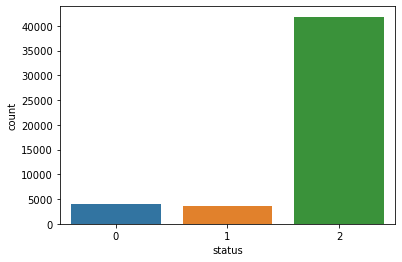

In [18]:
#checking the split of status across companies
sns.countplot(x='status',data=df)

In [19]:
#creating backup
df_backup = df

In [20]:
#dropping
df = df.drop(['category_list'], axis=1)

In [21]:
#we need only closed or acquired
df = df[df.status!=2]

<AxesSubplot:xlabel='status', ylabel='count'>

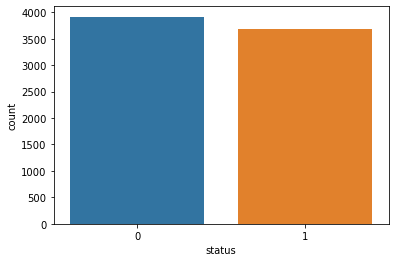

In [22]:
sns.countplot(x='status', data=df)

<AxesSubplot:>

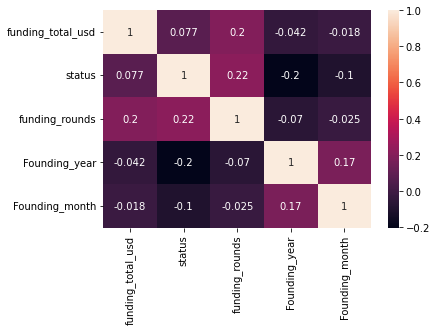

In [23]:
#checking correlation
sns.heatmap(df.corr(), annot=True)

In [24]:
#to reduce noise in data, let's delete all countries which are 0, and all countries that has less than 15 acquisitions
df = df[df.country_code!=0]
df = df[df.country_code != 'ZAF']
df = df[df.country_code != 'ARE']
df = df[df.country_code != 'AUS']
df = df[df.country_code != 'ARG']
df = df[df.country_code != 'AUT']
df = df[df.country_code != 'BEL']
df = df[df.country_code != 'BGR']
df = df[df.country_code != 'BMU']
df = df[df.country_code != 'BRA']
df = df[df.country_code != 'CHE']
df = df[df.country_code != 'CHL']
df = df[df.country_code != 'COL']
df = df[df.country_code != 'DNK']
df = df[df.country_code != 'FIN']
df = df[df.country_code != 'GRC']
df = df[df.country_code != 'HUN']
df = df[df.country_code != 'ITA']
df = df[df.country_code != 'JPN']
df = df[df.country_code != 'KOR']
df = df[df.country_code != 'LBN']
df = df[df.country_code != 'LTU']
df = df[df.country_code != 'LUX']
df = df[df.country_code != 'LVA']
df = df[df.country_code != 'MAF']
df = df[df.country_code != 'MEX']
df = df[df.country_code != 'MYS']
df = df[df.country_code != 'NOR']
df = df[df.country_code != 'NZL']
df = df[df.country_code != 'POL']
df = df[df.country_code != 'PRT']
df = df[df.country_code != 'RUS']
df = df[df.country_code != 'SGP']
df = df[df.country_code != 'SWE']
df = df[df.country_code != 'THA']
df = df[df.country_code != 'TUR']
df = df[df.country_code != 'URY']
df = df[df.country_code != 'ZAF']


In [25]:
#analysis purpose creating a data only with acquired status
df_acq = df[df.status != 0]

In [26]:
num = df_acq.groupby('country_code').count()

In [27]:
num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, CAN to USA
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   name               12 non-null     int64
 1   market             12 non-null     int64
 2   funding_total_usd  12 non-null     int64
 3   status             12 non-null     int64
 4   state_code         12 non-null     int64
 5   region             12 non-null     int64
 6   city               12 non-null     int64
 7   funding_rounds     12 non-null     int64
 8   first_funding_at   12 non-null     int64
 9   last_funding_at    12 non-null     int64
 10  Founding_year      12 non-null     int64
 11  Founding_month     12 non-null     int64
dtypes: int64(12)
memory usage: 1.2+ KB


In [28]:
#using above states
a = {'ct_cd' : ['CAN','CHN','DEU','ESP','FRA','GBR','IND','IRL','ISR','USA'], 'num': [103,25,73,24,47,141,17,17,60,2785]}

In [29]:
world = pd.DataFrame(data=a)
world

,ct_cd,num
0,CAN,103
1,CHN,25
2,DEU,73
3,ESP,24
4,FRA,47
5,GBR,141
6,IND,17
7,IRL,17
8,ISR,60
9,USA,2785


In [32]:
#plotting on a world graph
data = dict(
        type = 'choropleth',
        locations = world['ct_cd'],
        z = world['num'],
        text = world['ct_cd'],
        colorbar = {'title' : 'GDP Billions US'}
      ) 

layout = dict(
            title = 'Number of Acquistions',
            geo = dict(
                    showlakes = False,
    )
)

choromap = go.Figure(data = [data],layout = layout)
plot(choromap)

'temp-plot.html'

In [33]:
#viewing the plot, it's better to use only USA based data since there are not much acquisitions in other countries
df_m_USA = df_acq[df_acq.country_code == 'USA']

In [34]:
#state wise performance
num_uss = df_m_USA.groupby('state_code').count()
num_uss

,name,market,funding_total_usd,status,country_code,region,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,Founding_month
state_code,,,,,,,,,,,,
AL,3,3,3,3,3,3,3,3,3,3,2,2
AZ,14,14,14,14,14,14,14,14,14,14,11,11
CA,1351,1351,1351,1351,1351,1351,1351,1351,1351,1351,1144,1144
CO,62,62,62,62,62,62,62,62,62,62,49,49
CT,19,19,19,19,19,19,19,19,19,19,14,14
DC,9,9,9,9,9,9,9,9,9,9,9,9
DE,2,2,2,2,2,2,2,2,2,2,1,1
FL,39,39,39,39,39,39,39,39,39,39,31,31
GA,38,38,38,38,38,38,38,38,38,38,33,33


In [42]:
#visualizing on US map
#I wanted to check which states were doing the best in terms of acquisitions
state = pd.read_csv("us_state.csv")

data = dict(type = 'choropleth',
            locations = state['State'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= state['State'],
            z= state['Acquisitions'],
            colorbar = {'title':'Colorbar Title'})

layout = dict( title = 'Number of Acquistions', geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)

iplot(choromap)

In [43]:
#visualizing percentage of acquisitions
data = dict(type = 'choropleth',
            locations = state['State'],
            locationmode = 'USA-states',
            colorscale= 'Portland',
            text= state['State'],
            z= state['Acquisition %'],
            colorbar = {'title':'Colorbar Title'})

layout = dict( title = '% of Successful Exit', geo = {'scope':'usa'})

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [45]:
#analuzing dataset for the Market that the companies are present in
df_USA = df[df.country_code == 'USA']

In [46]:
US_market = df_USA.groupby('market').count()
US_market.sort_values('status', ascending=False)

,name,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,Founding_month
market,,,,,,,,,,,,
Software,547,547,547,547,547,547,547,547,547,547,455,455
Biotechnology,317,317,317,317,317,317,317,317,317,317,189,189
Curated Web,306,306,306,306,306,306,306,306,306,306,240,240
Mobile,242,242,242,242,242,242,242,242,242,242,208,208
Enterprise Software,211,211,211,211,211,211,211,211,211,211,178,178
...,...,...,...,...,...,...,...,...,...,...,...,...
Forums,1,1,1,1,1,1,1,1,1,1,1,1
RFID,1,1,1,1,1,1,1,1,1,1,0,0
Recycling,1,1,1,1,1,1,1,1,1,1,1,1


In [47]:
#to reduce noise picking only market with more than 15 companies
US_market = US_market[US_market.status > 15]
US_market_value = US_market['status']

In [49]:
#selecting only acquired companies
US_m_market = df_m_USA.groupby('market').count()
US_m_market_val = US_m_market[US_m_market.status > 5]
US_m_market_value = US_m_market_val['name']

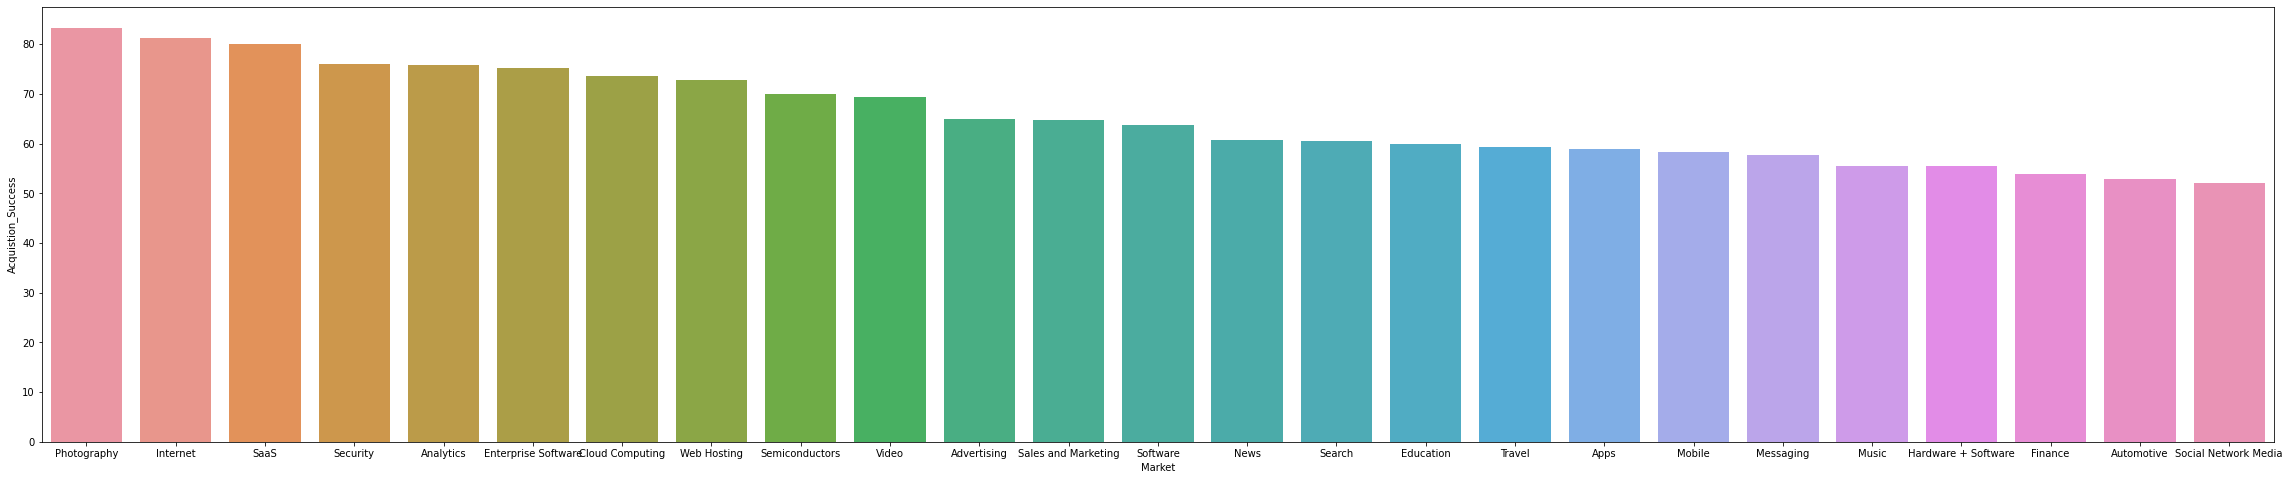

In [52]:
#calculating highest exits
market = pd.read_csv("USAMarket.csv")
plt.figure(figsize=(40,8))
sns.barplot(x='Market',y='Acquistion_Success',data=market[market.Acquistion_Success > 50.00])
plt.show()
#photography has the highest exits

In [53]:
df.head()

,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,Founding_month
0,#waywire,News,1750000.0,1,USA,NY,New York City,New York,1,2012-06-30,2012-06-30,2012.0,6.0
5,.Club Domains,Software,7000000.0,0,USA,FL,Ft. Lauderdale,Oakland Park,1,2013-05-31,2013-05-31,2011.0,10.0
20,1000memories,Curated Web,2535000.0,1,USA,CA,SF Bay Area,San Francisco,2,2010-01-01,2011-02-16,2010.0,7.0
27,100Plus,Analytics,1250000.0,1,USA,CA,SF Bay Area,San Francisco,2,2011-11-02,2011-11-30,2011.0,9.0
30,10BestThings,Curated Web,50000.0,0,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04-01,2009.0,4.0


In [54]:
df['first_funding_year'] = pd.DatetimeIndex(df['first_funding_at']).year
df['last_funding_year'] = pd.DatetimeIndex(df['last_funding_at']).year

In [55]:
#finding if any relationship exists between difference of company starting and receiving first fund
df['first_funding_gap'] = df['first_funding_year'] - df['Founding_year']
df['last_funding_gap'] = df['last_funding_year'] - df['Founding_year']
df['first_last_funding_gap'] = df['last_funding_year'] - df['first_funding_year']

In [56]:
df_new = df[df.country_code == 'USA']
df_new.head()

,name,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,Founding_month,first_funding_year,last_funding_year,first_funding_gap,last_funding_gap,first_last_funding_gap
0,#waywire,News,1750000.0,1,USA,NY,New York City,New York,1,2012-06-30,2012-06-30,2012.0,6.0,2012.0,2012,0.0,0.0,0.0
5,.Club Domains,Software,7000000.0,0,USA,FL,Ft. Lauderdale,Oakland Park,1,2013-05-31,2013-05-31,2011.0,10.0,2013.0,2013,2.0,2.0,0.0
20,1000memories,Curated Web,2535000.0,1,USA,CA,SF Bay Area,San Francisco,2,2010-01-01,2011-02-16,2010.0,7.0,2010.0,2011,0.0,1.0,1.0
27,100Plus,Analytics,1250000.0,1,USA,CA,SF Bay Area,San Francisco,2,2011-11-02,2011-11-30,2011.0,9.0,2011.0,2011,0.0,0.0,0.0
30,10BestThings,Curated Web,50000.0,0,USA,OH,Cleveland,Cleveland,1,2009-04-01,2009-04-01,2009.0,4.0,2009.0,2009,0.0,0.0,0.0


<AxesSubplot:>

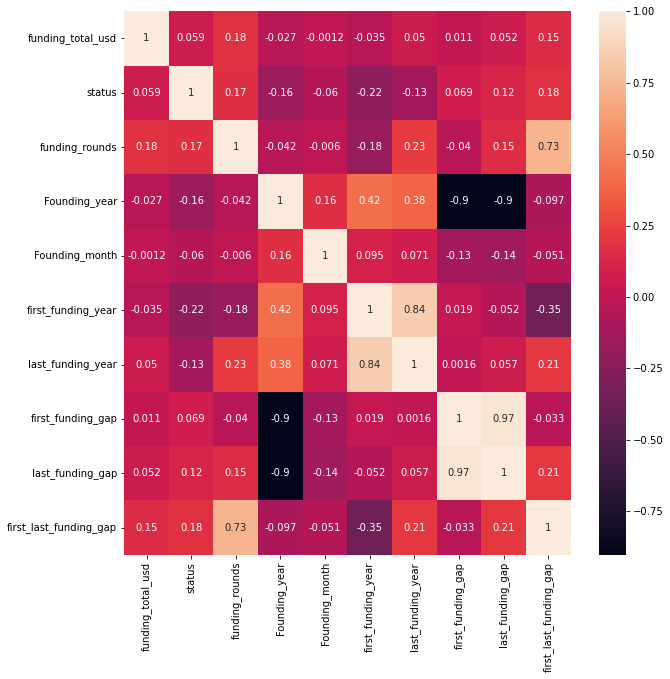

In [57]:
#checkin correlation again
plt.subplots(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True)

#looks better than earlier, still analysis and cleaning needed

In [58]:
#dropping more uneccesary columns
df_new = df_new.drop(['name','country_code','Founding_month'], axis=1)

In [66]:
#analysing Region and City Wise
pd.set_option('display.max_rows', 100)
US_city = df_new.groupby('region').count()
US_city.sort_values('status', ascending = False)

#Sf had more number of acquisitions

,market,funding_total_usd,status,state_code,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,first_funding_year,last_funding_year,first_funding_gap,last_funding_gap,first_last_funding_gap
region,,,,,,,,,,,,,,
SF Bay Area,1611,1611,1611,1611,1611,1611,1611,1611,1359,1611,1611,1359,1359,1611
New York City,444,444,444,444,444,444,444,444,376,444,444,376,376,444
Boston,353,353,353,353,353,353,353,353,288,353,353,288,288,353
Los Angeles,249,249,249,249,249,249,249,249,205,249,249,205,205,249
Seattle,196,196,196,196,196,196,196,196,164,196,196,164,164,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Akron - Canton,1,1,1,1,1,1,1,1,1,1,1,1,1,1
MN - Other,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Lansing,1,1,1,1,1,1,1,1,0,1,1,0,0,1


In [67]:
#further cutting down noise
US_city = US_city[US_city.status > 15]

In [68]:
US_m_region = df_m_USA.groupby('region').count()
US_m_region = US_m_region[US_m_region.status > 5]

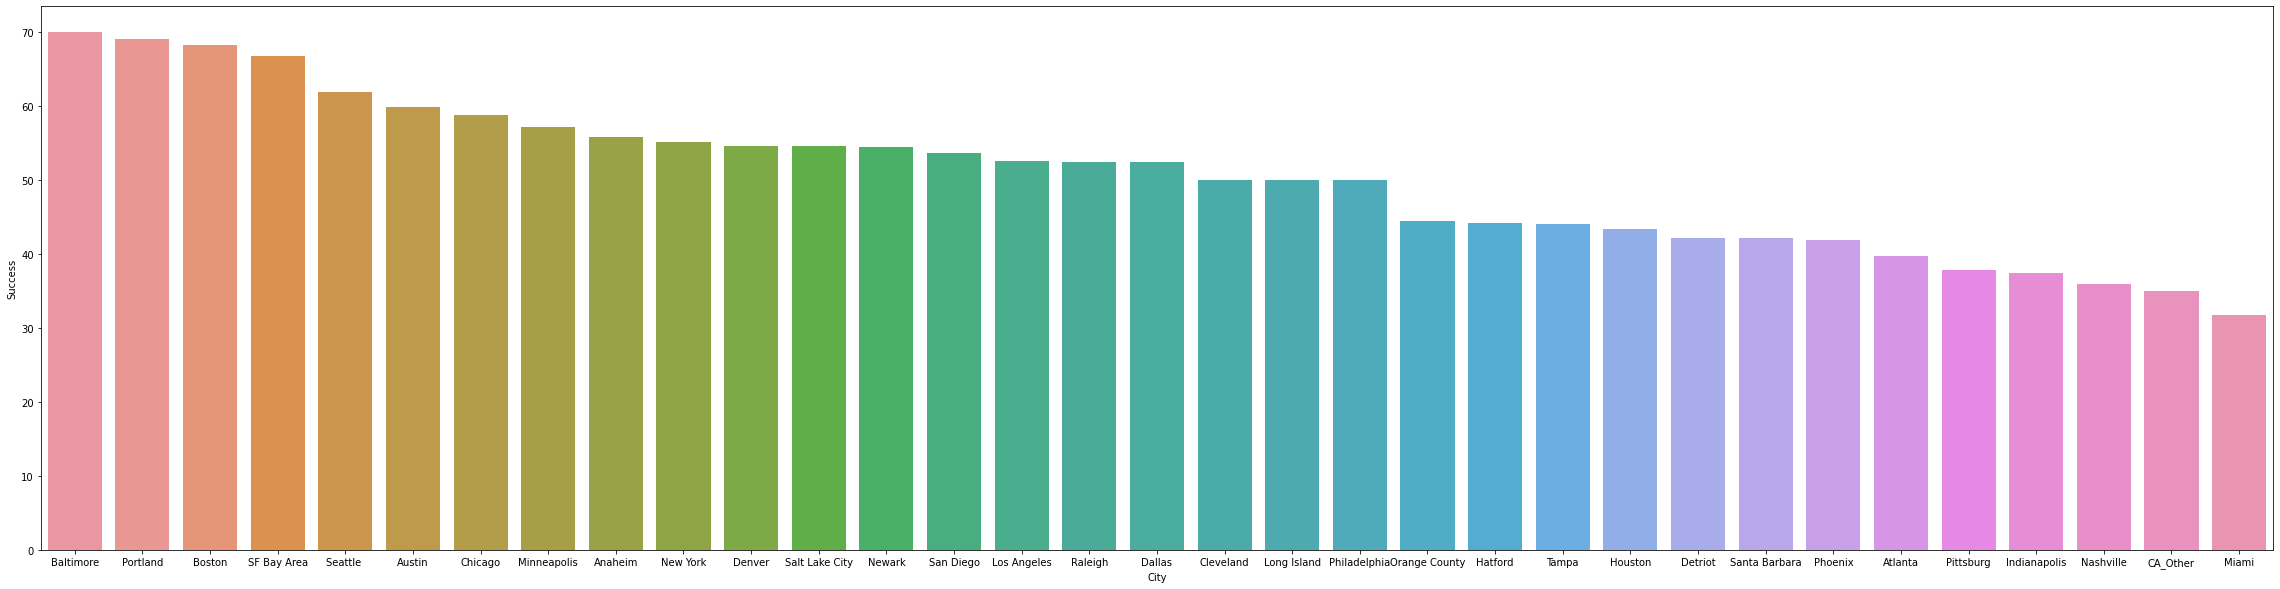

In [70]:
#plotting percentage of successful exits again
region = pd.read_csv('Region.csv')
plt.figure(figsize=(40,10))
sns.barplot(x='City',y='Success', data=region[region.Success>20.00])
plt.show()

#hence we know city, region and market plays important role or has influence

In [71]:
#removing 0 values from these columns
df_new = df_new[df_new.market !=0]
df_new = df_new[df_new.region !=0]
df_new = df_new[df_new.city !=0]
df_new = df_new[df_new.Founding_year !=0]
df_new = df_new[df_new.first_funding_year !=0]
df_new.isnull().sum()

market                      0
funding_total_usd           0
status                      0
state_code                  0
region                      0
city                        0
funding_rounds              0
first_funding_at            1
last_funding_at             0
Founding_year             829
first_funding_year          1
last_funding_year           0
first_funding_gap         830
last_funding_gap          829
first_last_funding_gap      1
dtype: int64

In [72]:
df_new['Founding_year'] = df_new['Founding_year'].fillna(value=0)
df_new['first_funding_gap'] = df_new['first_funding_gap'].fillna(value=0)
df_new['last_funding_gap'] = df_new['last_funding_gap'].fillna(value=0)
df_new['first_last_funding_gap'] = df_new['first_last_funding_gap'].fillna(value=0)
df_new['first_funding_at'] = df_new['first_funding_at'].fillna(value=0)
df_new['first_funding_year'] = df_new['first_funding_year'].fillna(value=0)

In [73]:
df_new.isnull().sum()

market                    0
funding_total_usd         0
status                    0
state_code                0
region                    0
city                      0
funding_rounds            0
first_funding_at          0
last_funding_at           0
Founding_year             0
first_funding_year        0
last_funding_year         0
first_funding_gap         0
last_funding_gap          0
first_last_funding_gap    0
dtype: int64

In [74]:
#converting categorical columns to integer values
#converting type objects to category to make the changes
df_new['region'] = df_new['region'].astype('category')
df_new['market'] = df_new['market'].astype('category')
df_new['city'] = df_new['city'].astype('category')

In [75]:
#generating integer values
df_new['market'] = df_new['market'].cat.codes
df_new['region'] = df_new['region'].cat.codes
df_new['city'] = df_new['city'].cat.codes

In [76]:
df_new.head(20)

,market,funding_total_usd,status,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,Founding_year,first_funding_year,last_funding_year,first_funding_gap,last_funding_gap,first_last_funding_gap
0,226,1750000.0,1,NY,104,449,1,2012-06-30 00:00:00,2012-06-30,2012.0,2012.0,2012,0.0,0.0,0.0
5,309,7000000.0,0,FL,51,469,1,2013-05-31 00:00:00,2013-05-31,2011.0,2013.0,2013,2.0,2.0,0.0
20,79,2535000.0,1,CA,131,569,2,2010-01-01 00:00:00,2011-02-16,2010.0,2010.0,2011,0.0,1.0,1.0
27,8,1250000.0,1,CA,131,569,2,2011-11-02 00:00:00,2011-11-30,2011.0,2011.0,2011,0.0,0.0,0.0
30,79,50000.0,0,OH,32,145,1,2009-04-01 00:00:00,2009-04-01,2009.0,2009.0,2009,0.0,0.0,0.0
50,102,0.0,1,CA,79,679,1,2012-04-05 00:00:00,2012-04-05,2012.0,2012.0,2012,0.0,0.0,0.0
62,309,14000000.0,1,MA,17,48,1,2002-04-16 00:00:00,2002-04-16,1990.0,2002.0,2002,12.0,12.0,0.0
69,185,0.0,0,WA,140,319,1,2008-08-12 00:00:00,2008-08-12,2006.0,2008.0,2008,2.0,2.0,0.0
74,102,50000.0,0,CA,109,578,1,2008-06-30 00:00:00,2008-06-30,2008.0,2008.0,2008,0.0,0.0,0.0
89,128,10000000.0,0,FL,91,405,1,2014-05-07 00:00:00,2014-05-07,2007.0,2014.0,2014,7.0,7.0,0.0


In [77]:
#dropping state code since we have considered city and region
df_new = df_new.drop(['state_code'], axis=1)

<AxesSubplot:>

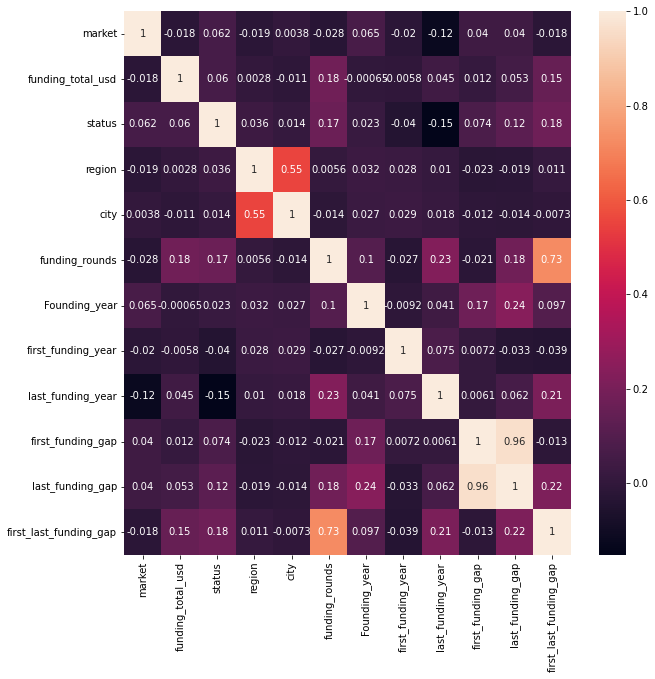

In [78]:
#checking correlation
plt.subplots(figsize=(10,10))
sns.heatmap(df_new.corr(), annot=True)